In [42]:
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [43]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [44]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 472899071499319708,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1379676571
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16618821704938602176
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [48]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [49]:
train_scaled=train_input/255.0

In [50]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [51]:
model=model_fn(keras.layers.Dropout(0.3))

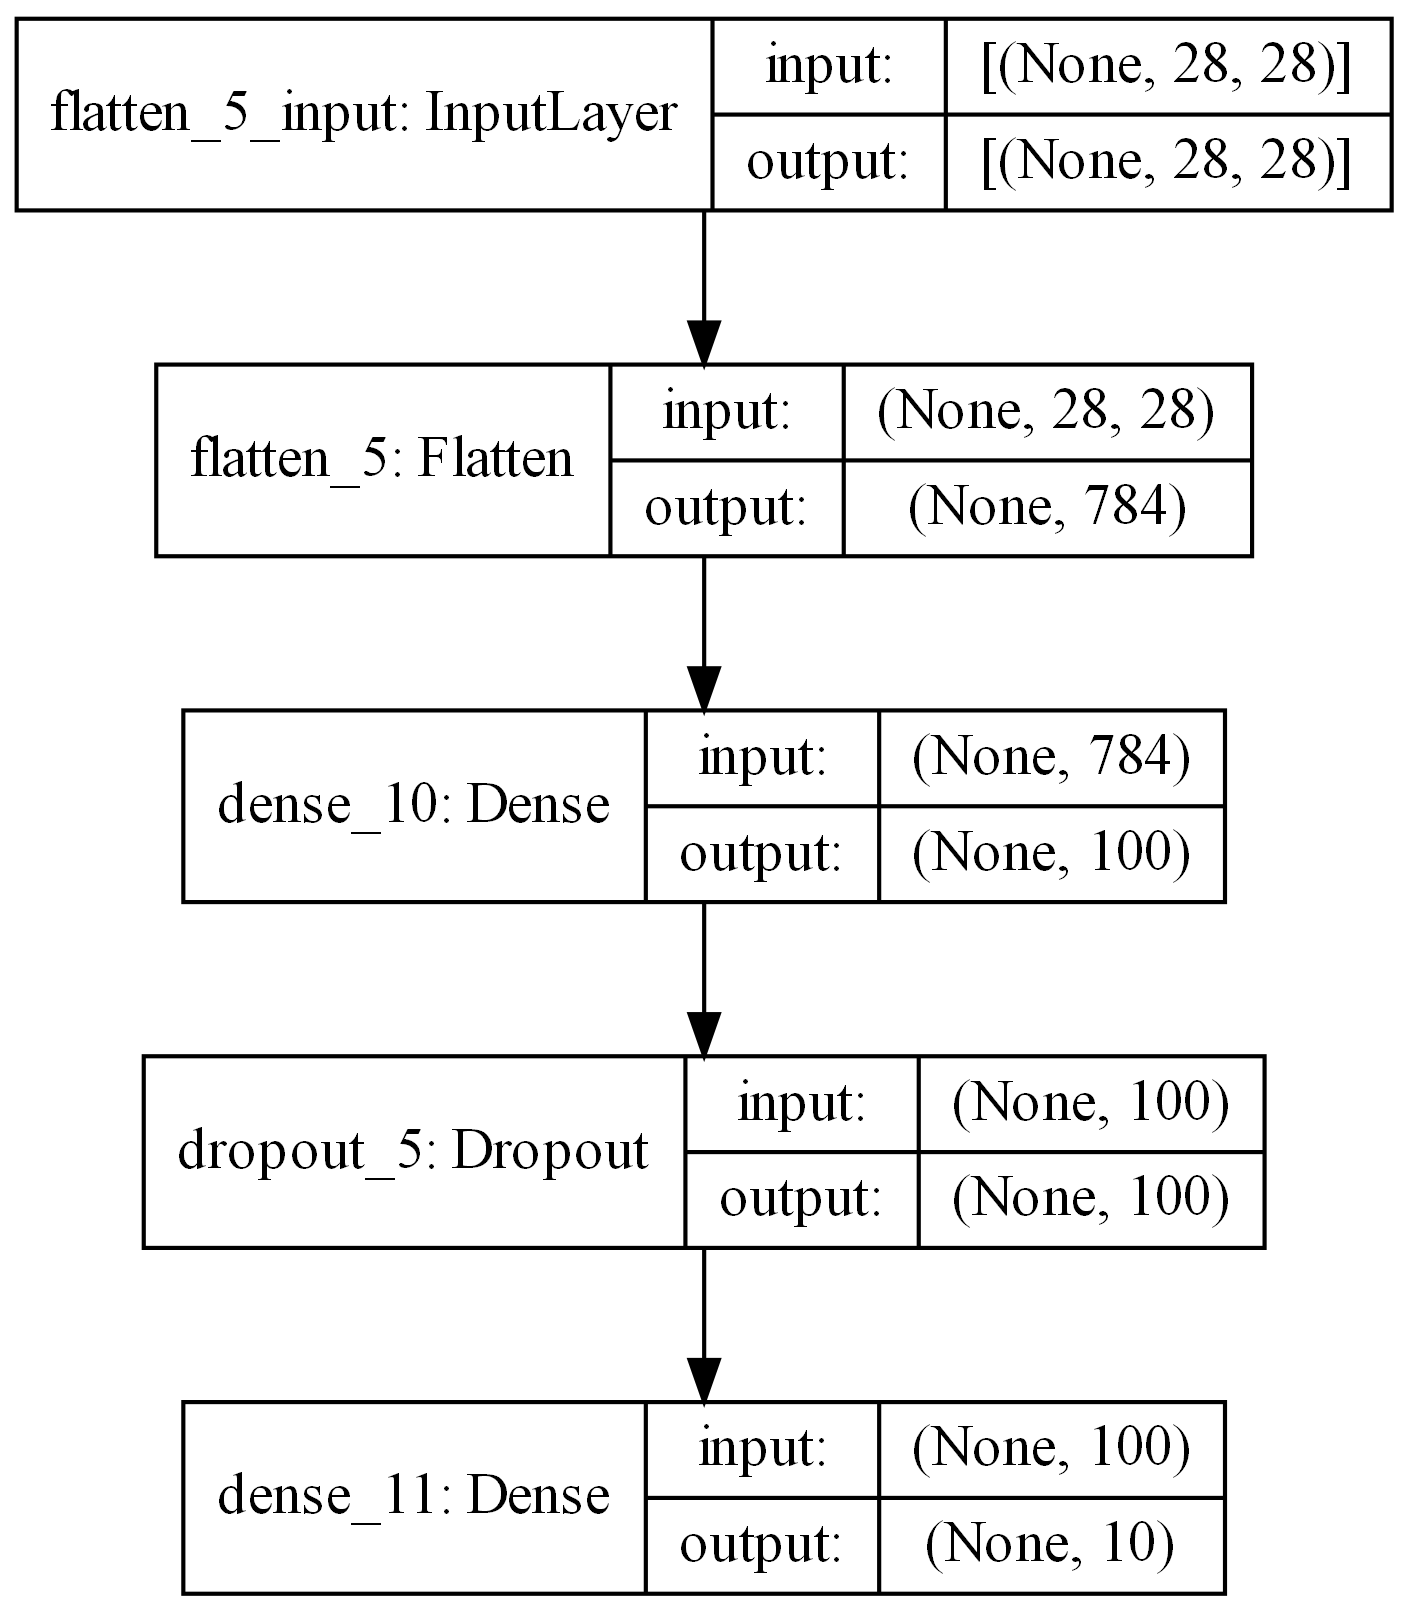

In [52]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

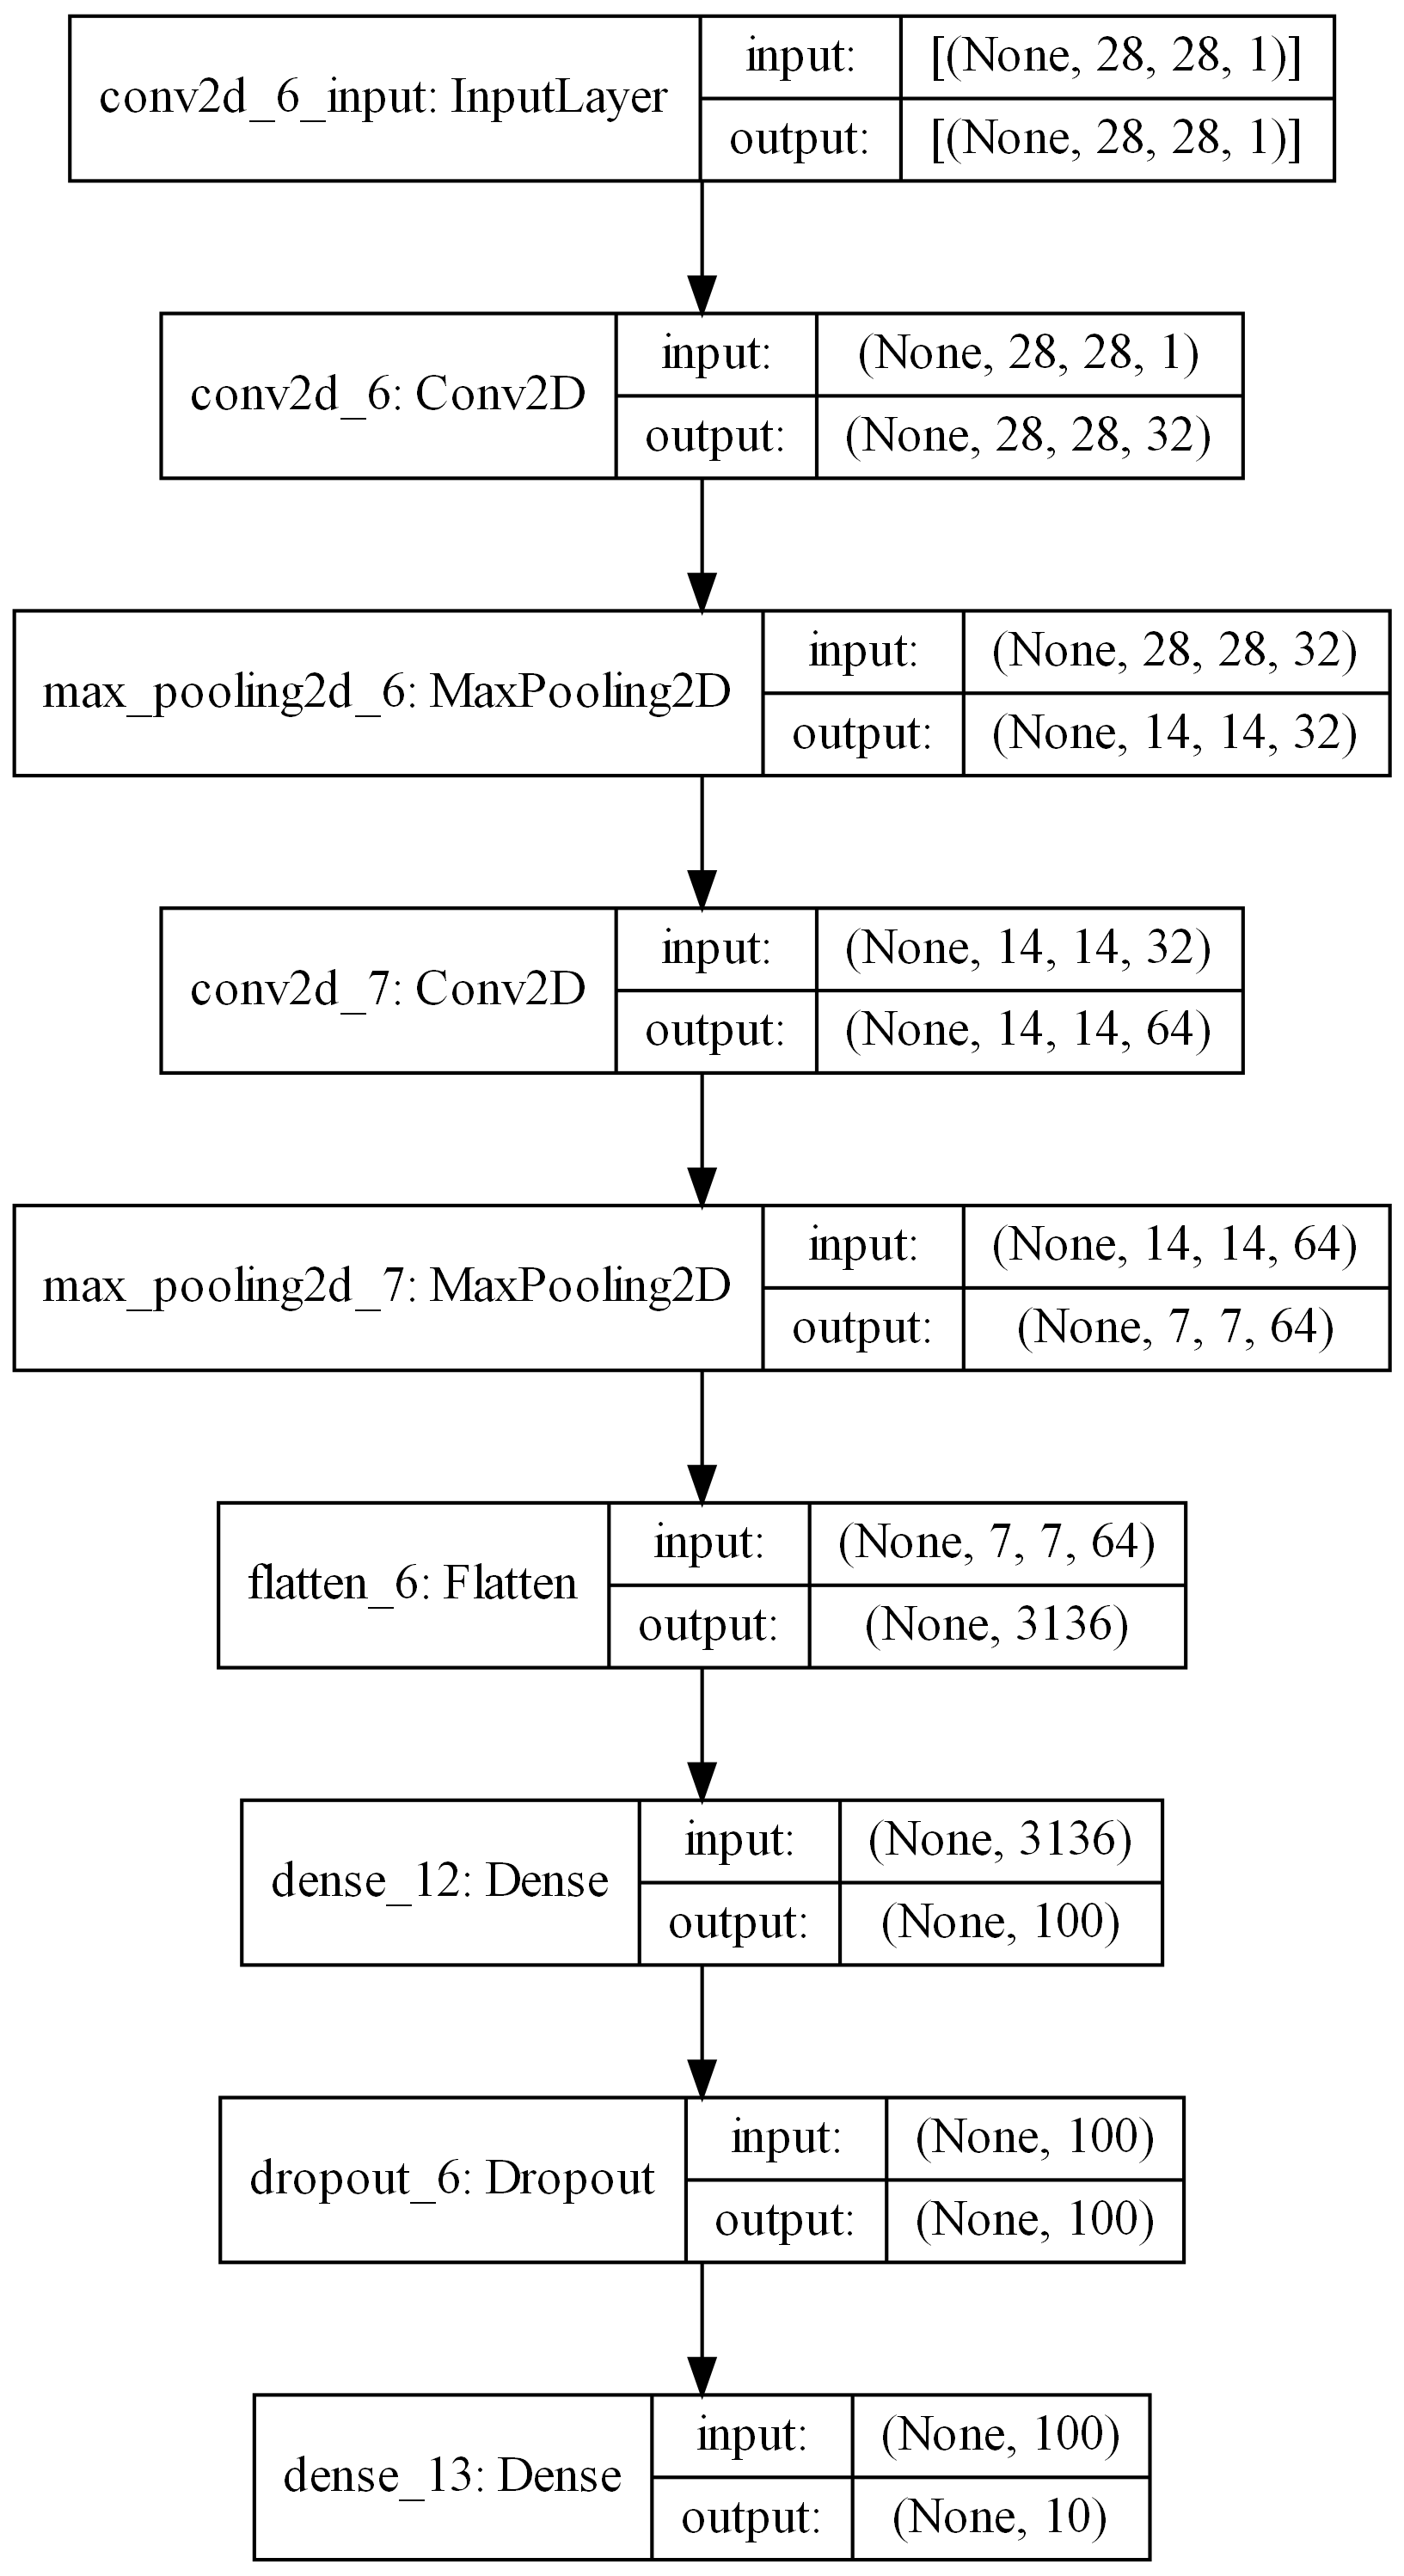

In [53]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
hist = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4871 - accuracy: 0.8270 - val_loss: 0.3025 - val_accuracy: 0.8854
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3252 - accuracy: 0.8834 - val_loss: 0.2435 - val_accuracy: 0.9103
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2763 - accuracy: 0.9000 - val_loss: 0.2107 - val_accuracy: 0.9245
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2488 - accuracy: 0.9078 - val_loss: 0.1798 - val_accuracy: 0.9343
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2259 - accuracy: 0.9169 - val_loss: 0.1654 - val_accuracy: 0.9352
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2068 - accuracy: 0.9250 - val_loss: 0.1518 - val_accuracy: 0.9431
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1919 - accuracy: 0.9298 - val_loss: 0.1463 - val_ac

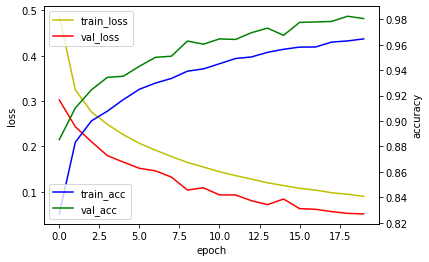

In [55]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [56]:
model.save_weights('model-weights.h5')#wiegyth 저장값

In [57]:
model.save("best-cnn-model.h5")#전체모델세이브

In [58]:
!dir *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D89C-10F0

 C:\Users\KOREAIT\worksapca\vision 디렉터리

2022-10-13  오후 03:48         4,048,392 best-cnn-model.h5
2022-10-13  오후 03:48         1,354,320 model-weights.h5
2022-10-13  오후 02:55           981,736 model-whole.h5
               3개 파일           6,384,448 바이트
               0개 디렉터리  72,585,158,656 바이트 남음


In [59]:
model=keras.models.load_model("best-cnn-model.h5")#전체모델세이브
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               313700    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)              

In [60]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9806


[0.05122612044215202, 0.9805833101272583]

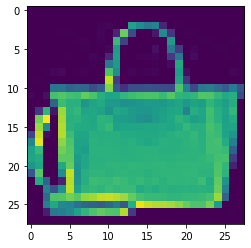

In [61]:
plt.imshow(val_scaled[0])

In [62]:
preds=model.predict(val_scaled[0:1])
print(preds)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0629133e-35 2.5213212e-35 0.0000000e+00 1.0000000e+00 9.7099801e-32]]


In [63]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


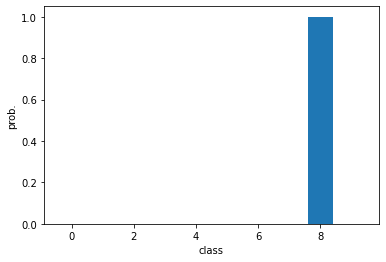

In [64]:
plt.bar(range(0,10),preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [68]:
import numpy as np
model.evaluate(val_scaled, val_target)
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

375/375 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9806


In [ ]:
print(classes[np.argmax(padise)])

In [69]:
model=keras.models.load_model("best-cnn-model.h5")#전체모델세이브
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               313700    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)              

In [70]:
model.layers

In [71]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [72]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.046522394 0.36500913


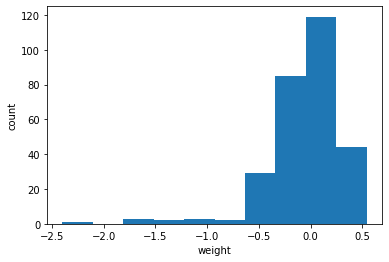

In [73]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

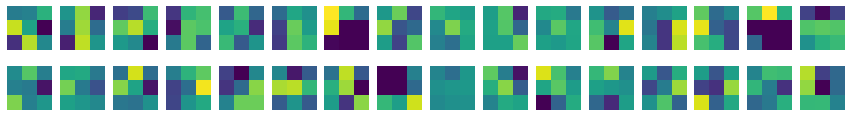

In [74]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [79]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [82]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.008048425 0.08259986


In [81]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


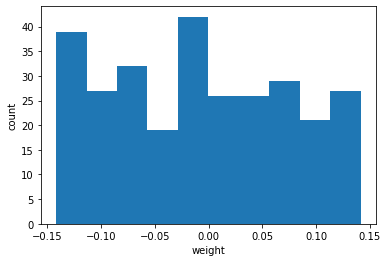

In [83]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

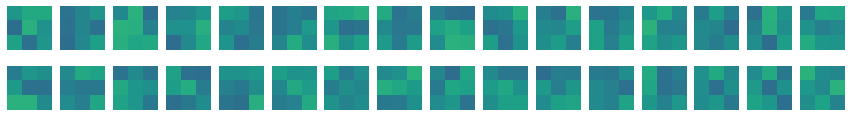

In [84]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show() #coubeul효과가없음

In [85]:
#특성맵 시각화

In [87]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [88]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

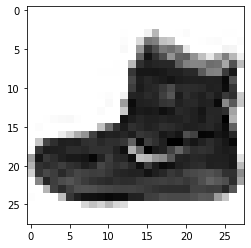

In [90]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [89]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

In [92]:
print(feature_maps.shape)

(1, 28, 28, 32)


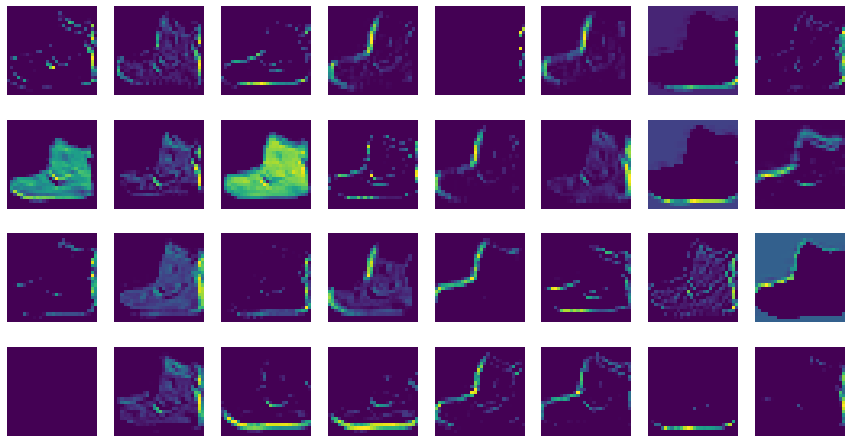

In [91]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()# 특성을 예측하는 과정을 보여준다

In [93]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [94]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [95]:
print(feature_maps.shape)

(1, 14, 14, 64)


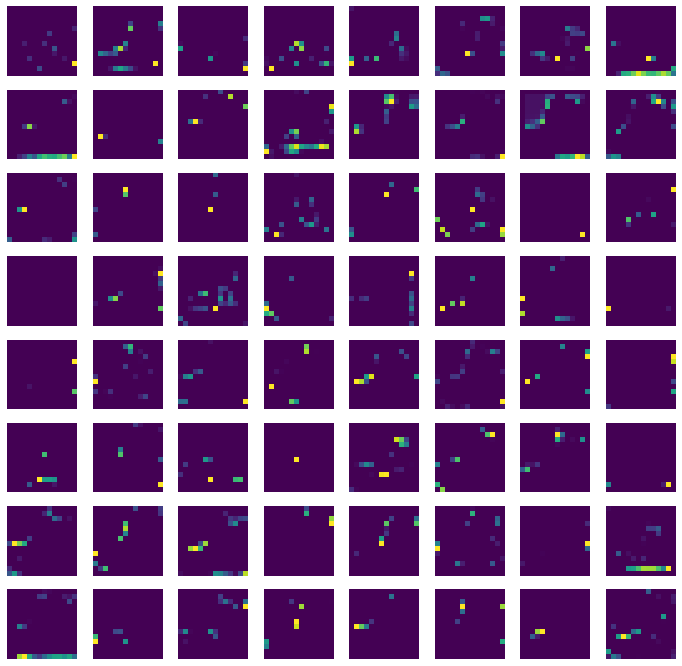

In [96]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show() #컴퓨터가 알아먹을수 있게 도트형식으로 